# Video Game Analysis
<img src="https://github.com/Kodchalerk/EDA-Video-Game-Analysis/blob/main/pic/game.png?raw=True" alt="Drawing" style="width: 1000px;"/>

*Image Source : IGN*


**In this project, we will be focusing on answering the following questions** :

- What is the most popular video game genre?
- What are the top most popular games by rating between 2021 and 2023
- What is the trend of video game industry?
- What is the most popular game by each genre?

**Please feel free to explore the visualization yourself and hope you enjoy!**

# About Dataset
---

This dataset contains a list of video games dating from 1980 to 2023, it also provides things such as release dates, user review rating, and critic review rating.

Not only can you find the popular games mentioned here but also the obscure indie ones which we have forgotten in time!

Backloggd is a video game collection website mixed with social elements to focus on bringing your gaming profile to life. Create a free account to get started on logging the games you've played, and then rating and reviewing as you go! Go into detail with logging platforms, time played, and even a daily journal to keep track your daily gaming progress with playthroughs. It's all tailored to how much you want to log, so that your profile fits you. Then outside of that you can create lists of games, friend other users, follow their activities, and so much more!


Link to the dataset: https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023

# Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime as dt
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Importing dataset
df = pd.read_csv('https://github.com/Kodchalerk/EDA-Video-Game-Analysis/blob/main/games.csv?raw=True')
df

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


# Data Cleaning
---
## Things to do in this stage.


- Change columns' titles into the same format
- Drop unused columns
- Rename columns for clarification
- Check and drop null values
- Change data type
- Some columns supposed to be numeric , instead , they are object type and composed of letter 'K' in their values. So, we will handle this.
- Prepare dataframe for visualization

In [3]:
# Change columns title into the same format
df.columns = [i.lower().replace(' ','_') for i in df.columns ]

In [4]:
# Drop unnecssary column
df.drop(columns = ['unnamed:_0'], inplace = True)

In [5]:
df.columns

Index(['title', 'release_date', 'team', 'rating', 'times_listed',
       'number_of_reviews', 'genres', 'summary', 'reviews', 'plays', 'playing',
       'backlogs', 'wishlist'],
      dtype='object')

In [6]:
# Rename columns for clarification
df.rename(columns = {'plays':'no_of_people_play' , 'playing':'no_active_players'} , inplace = True)

In [7]:
df.columns

Index(['title', 'release_date', 'team', 'rating', 'times_listed',
       'number_of_reviews', 'genres', 'summary', 'reviews',
       'no_of_people_play', 'no_active_players', 'backlogs', 'wishlist'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1512 non-null   object 
 1   release_date       1512 non-null   object 
 2   team               1511 non-null   object 
 3   rating             1499 non-null   float64
 4   times_listed       1512 non-null   object 
 5   number_of_reviews  1512 non-null   object 
 6   genres             1512 non-null   object 
 7   summary            1511 non-null   object 
 8   reviews            1512 non-null   object 
 9   no_of_people_play  1512 non-null   object 
 10  no_active_players  1512 non-null   object 
 11  backlogs           1512 non-null   object 
 12  wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 153.7+ KB


In [9]:
# Check null values
null_values = pd.Series(df.isnull().sum())
null_percentage = pd.Series(df.isnull().mean())*100
pd.concat([null_values,null_percentage] , axis = 1)

,0,1
title,0,0.000000
release_date,0,0.000000
team,1,0.066138
rating,13,0.859788
times_listed,0,0.000000
number_of_reviews,0,0.000000
genres,0,0.000000
summary,1,0.066138
reviews,0,0.000000
no_of_people_play,0,0.000000


In [10]:
# Drop null values
df.dropna(inplace = True)

In [11]:
# Change columns type
df.release_date.unique()
# there is 'release on TBD included in the column'
# delete that certain value
df = df[df['release_date'] != 'releases on TBD' ]
# Change column to date time format

df['release_date'] = pd.to_datetime(df['release_date'])


In [12]:
# It seems that some columns are supposed to be numeric , instead , they are object because there is k present in its value
# Relplace K with 000 and '.' with blank. Then cast it as numeric
def clean_k(x):
    x = pd.to_numeric(str(x).replace('K',' '))
    if type(x) == 'float':
        return x * 1000
    elif x < 100:
        return x * 1000
    else:
        return x

In [13]:
# Creat a list of columns with k
columns_with_k = ['times_listed','number_of_reviews','no_of_people_play','no_active_players','backlogs','wishlist']

# Apply function to these columns
for i in columns_with_k:
    df[i] = df[i].apply(clean_k)

In [14]:
df['no_active_players']  = np.where(df['no_active_players'] >= df['no_of_people_play'], df['no_active_players'] / 1000 , df['no_active_players'])

In [15]:
#Clean team and genre columns except reviews column
columns_with_sym = ['team','genres']

def clean_sym(x):
    return str(x).replace('[' ,' ').replace(']' ,' ').replace("'",' ').replace(' ','')

In [16]:
# Apply function
for i in columns_with_sym:
    df[i] = df[i].apply(clean_sym)

In [17]:
# Prepare dataframe for analyzing most popular genre
# Split values in genres
genre = pd.DataFrame(df['genres'].str.get_dummies(',').sum())
genre = genre.reset_index()
genre.columns = ['genre','count']
genre = genre.sort_values('count', ascending = False)
genre

,genre,count
0,Adventure,1005
13,RPG,514
16,Shooter,351
9,Platform,329
5,Indie,282
11,Puzzle,174
2,Brawler,157
19,Strategy,142
17,Simulator,125
21,TurnBasedStrategy,99


In [18]:
#Prepare dataframe for analyzing most popular game in each genre
gen = pd.DataFrame(df['genres'].str.get_dummies(','))
df = pd.concat([df,gen] , axis = 1)

,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,no_of_people_play,...,RPG,Racing,RealTimeStrategy,Shooter,Simulator,Sport,Strategy,Tactical,TurnBasedStrategy,VisualNovel
0,Elden Ring,2022-02-25,"BandaiNamcoEntertainment,FromSoftware",4.5,3900.0,3900.0,"Adventure,RPG","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,...,1,0,0,0,0,0,0,0,0,0
1,Hades,2019-12-10,SupergiantGames,4.3,2900.0,2900.0,"Adventure,Brawler,Indie,RPG",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,...,1,0,0,0,0,0,0,0,0,0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo,NintendoEPDProductionGroupNo.3",4.4,4300.0,4300.0,"Adventure,RPG",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,...,1,0,0,0,0,0,0,0,0,0
3,Undertale,2015-09-15,"tobyfox,8-4",4.2,3500.0,3500.0,"Adventure,Indie,RPG,TurnBasedStrategy","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,...,1,0,0,0,0,0,0,0,1,0
4,Hollow Knight,2017-02-24,TeamCherry,4.4,3000.0,3000.0,"Adventure,Indie,Platform",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,TelltaleGames,3.2,94000.0,94000.0,"Adventure,Point-and-Click",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763.0,...,0,0,0,0,0,0,0,0,0,0
1508,Team Sonic Racing,2019-05-21,"SumoDigital,Sega",2.9,264.0,264.0,"Arcade,Racing",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500.0,...,0,1,0,0,0,0,0,0,0,0
1509,Dragon's Dogma,2012-05-22,Capcom,3.7,210.0,210.0,"Brawler,RPG","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100.0,...,1,0,0,0,0,0,0,0,0,0
1510,Baldur's Gate 3,2020-10-06,LarianStudios,4.1,165.0,165.0,"Adventure,RPG,Strategy,Tactical,TurnBasedStrategy","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,...,1,0,0,0,0,0,1,1,1,0


In [19]:
df.columns

Index(['title', 'release_date', 'team', 'rating', 'times_listed',
       'number_of_reviews', 'genres', 'summary', 'reviews',
       'no_of_people_play', 'no_active_players', 'backlogs', 'wishlist',
       'Adventure', 'Arcade', 'Brawler', 'Card&BoardGame', 'Fighting', 'Indie',
       'MOBA', 'Music', 'Pinball', 'Platform', 'Point-and-Click', 'Puzzle',
       'Quiz/Trivia', 'RPG', 'Racing', 'RealTimeStrategy', 'Shooter',
       'Simulator', 'Sport', 'Strategy', 'Tactical', 'TurnBasedStrategy',
       'VisualNovel'],
      dtype='object')

In [20]:
# Make a copy of clean data
df1 = df.copy()

,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,no_of_people_play,...,RPG,Racing,RealTimeStrategy,Shooter,Simulator,Sport,Strategy,Tactical,TurnBasedStrategy,VisualNovel
0,Elden Ring,2022-02-25,"BandaiNamcoEntertainment,FromSoftware",4.5,3900.0,3900.0,"Adventure,RPG","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,...,1,0,0,0,0,0,0,0,0,0
1,Hades,2019-12-10,SupergiantGames,4.3,2900.0,2900.0,"Adventure,Brawler,Indie,RPG",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,...,1,0,0,0,0,0,0,0,0,0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo,NintendoEPDProductionGroupNo.3",4.4,4300.0,4300.0,"Adventure,RPG",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,...,1,0,0,0,0,0,0,0,0,0
3,Undertale,2015-09-15,"tobyfox,8-4",4.2,3500.0,3500.0,"Adventure,Indie,RPG,TurnBasedStrategy","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,...,1,0,0,0,0,0,0,0,1,0
4,Hollow Knight,2017-02-24,TeamCherry,4.4,3000.0,3000.0,"Adventure,Indie,Platform",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,TelltaleGames,3.2,94000.0,94000.0,"Adventure,Point-and-Click",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763.0,...,0,0,0,0,0,0,0,0,0,0
1508,Team Sonic Racing,2019-05-21,"SumoDigital,Sega",2.9,264.0,264.0,"Arcade,Racing",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500.0,...,0,1,0,0,0,0,0,0,0,0
1509,Dragon's Dogma,2012-05-22,Capcom,3.7,210.0,210.0,"Brawler,RPG","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100.0,...,1,0,0,0,0,0,0,0,0,0
1510,Baldur's Gate 3,2020-10-06,LarianStudios,4.1,165.0,165.0,"Adventure,RPG,Strategy,Tactical,TurnBasedStrategy","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,...,1,0,0,0,0,0,1,1,1,0


# Visualization
---

In this part we will visualize 4 figures to answer the following questions.

- What is the most popular video game genre?
- What are the top most popular games by rating between 2021 and 2023
- What is the trend of video game industry?
- What is the most popular game by each genre?

## What is the most popular video game genre?

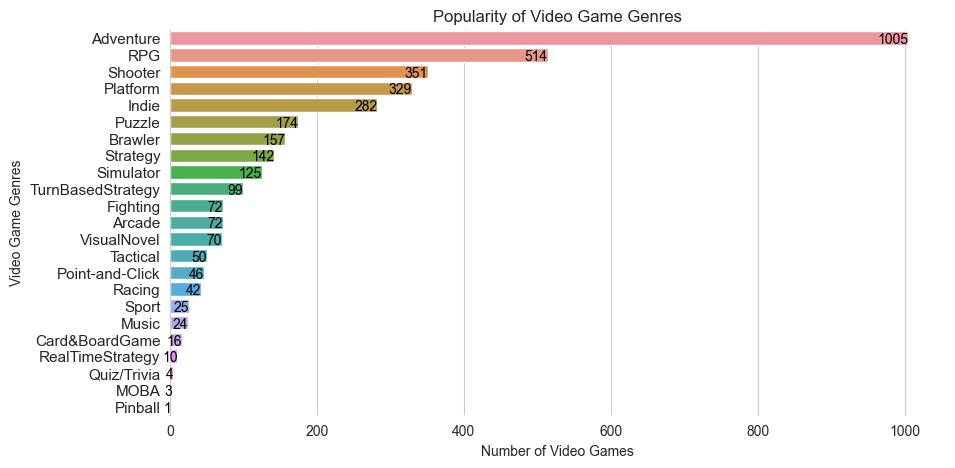

In [21]:
# What is the most popular video game genre?

fig = plt.figure(figsize = (10,5))

ax = sns.barplot(data = genre, y = 'genre' , x = 'count')

ax.set_xlabel('Number of Video Games')
ax.set_ylabel('Video Game Genres')
ax.set_title('Popularity of Video Game Genres')
ax.tick_params(axis="y", labelsize=11);
sns.despine(right=True, top=True, bottom=True)

for i, v in enumerate(genre['count'].values):
    ax.text(v, i, str(v), color="black", ha="right", va="center_baseline")


In [22]:
df1['year'] = df['release_date'].dt.year

## What are the top most popular games by rating between 2021 and 2023

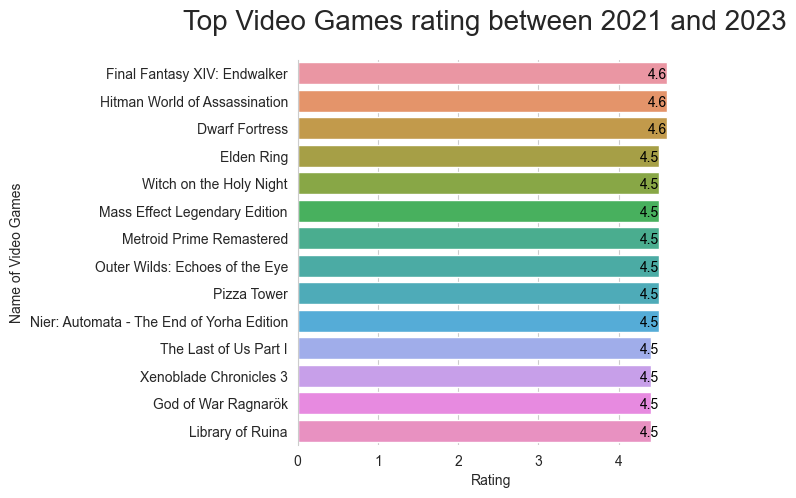

In [23]:
# What are the top most popular game betwwen 2021 and 2023

# Extract year in data
df_pop = df1.loc[(df1['year'] == 2023) | (df1['year'] == 2022) | (df1['year'] == 2021)].sort_values('rating' , ascending = False).head(20)

fig = plt.figure(figsize = (5,5))
fig.suptitle('Top Video Games rating between 2021 and 2023', fontsize=20)
ax = sns.barplot(data = df_pop , x = 'rating' , y= 'title')
ax.set_xlabel('Rating')
ax.set_ylabel('Name of Video Games')
ax.tick_params(axis="y", labelsize=10);
sns.despine(right=True, top=True, bottom=True)

for i, v in enumerate(df_pop.rating[0:14].values):
    ax.text(v, i, v, color="black", ha="right", va="center_baseline")


In [24]:
df_release_date = df1[['year','rating','no_of_people_play','no_active_players']].groupby('year').agg('mean')
df_release_date

,rating,no_of_people_play,no_active_players
year,,,
1980,3.400000,5200.000000,7.000000
1982,3.600000,1600.000000,1000.000000
1985,3.500000,18000.000000,59.000000
1986,3.275000,6425.000000,81.250000
1987,2.766667,3933.333333,36.666667
1988,3.520000,10380.000000,73.800000
1989,3.880000,6780.000000,38.800000
1990,3.666667,4866.666667,54.333333
1991,3.463636,7021.727273,97.090909


## What is the trend of video game industry?

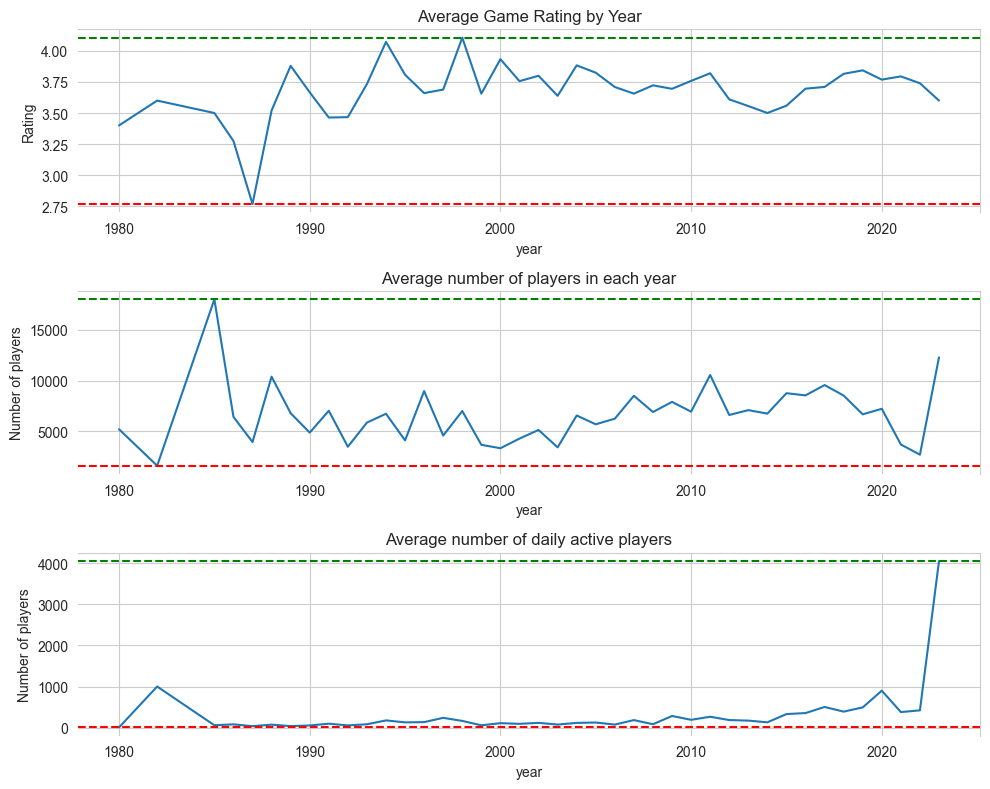

In [25]:
# Trend of video games.

fig = plt.figure(figsize = (10,8))

## ax1
ax1 = fig.add_subplot(3,1,1)
ax1 = sns.lineplot(data = df_release_date , x= df_release_date.index , y = 'rating')
ax1.set_title('Average Game Rating by Year')
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.axhline(y=df_release_date["rating"].max(), color="green", linestyle="--")
ax1.axhline(y=df_release_date["rating"].min(), color="red", linestyle="--")
ax1.set_ylabel('Rating')
## ax2
ax2 = fig.add_subplot(3,1,2)
ax2 = sns.lineplot(data = df_release_date , x= df_release_date.index , y = 'no_of_people_play')
ax2.set_title('Average number of players in each year')
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.axhline(y=df_release_date["no_of_people_play"].max(), color="green", linestyle="--")
ax2.axhline(y=df_release_date["no_of_people_play"].min(), color="red", linestyle="--")
ax2.set_ylabel('Number of players')
## ax3
ax3 = fig.add_subplot(3,1,3)
ax3 = sns.lineplot(data = df_release_date , x= df_release_date.index , y = 'no_active_players')
ax3.set_title('Average number of daily active players')
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.axhline(y=df_release_date["no_active_players"].max(), color="green", linestyle="--")
ax3.axhline(y=df_release_date["no_active_players"].min(), color="red", linestyle="--")
ax3.set_ylabel('Number of players')
##
plt.tight_layout()

In [26]:
genre_columns = ['Adventure', 'Arcade', 'Brawler', 'Card&BoardGame', 'Fighting', 'Indie',
       'MOBA', 'Music', 'Pinball', 'Platform', 'Point-and-Click', 'Puzzle',
       'Quiz/Trivia', 'RPG', 'Racing', 'RealTimeStrategy', 'Shooter',
       'Simulator', 'Sport', 'Strategy', 'Tactical', 'TurnBasedStrategy',
       'VisualNovel']

In [27]:
df['rating'].nlargest(10)

28     4.6
43     4.6
139    4.6
252    4.6
297    4.6
354    4.6
369    4.6
428    4.6
539    4.6
717    4.6
Name: rating, dtype: float64

## What is the most popular game by each genre?

- Please feel free to explore this yourself

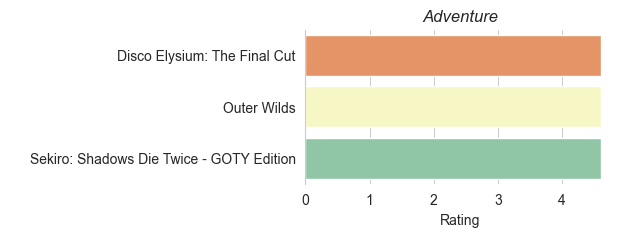

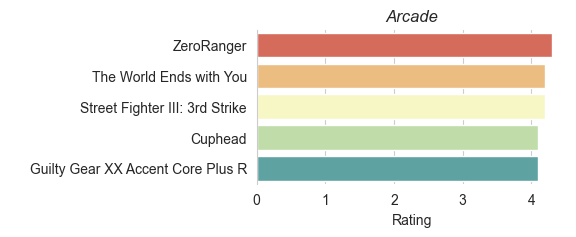

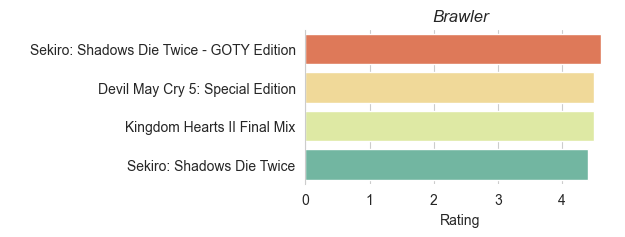

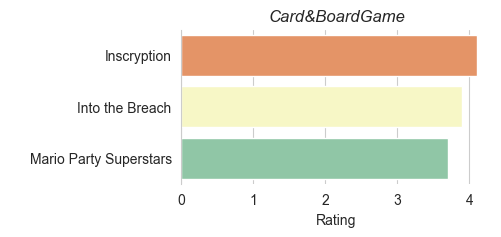

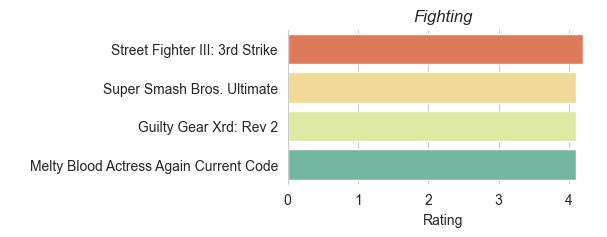

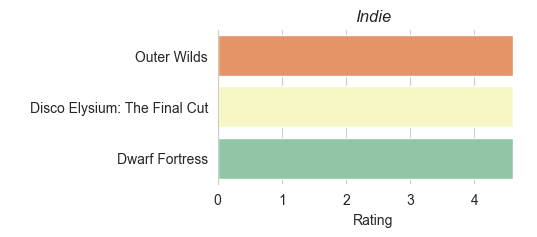

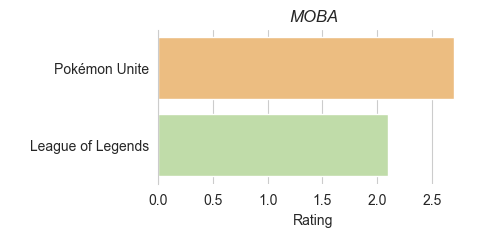

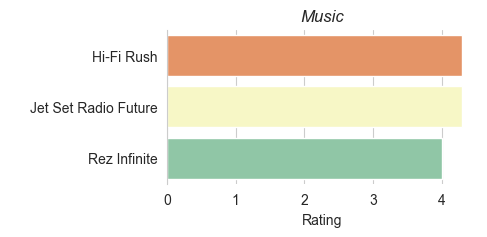

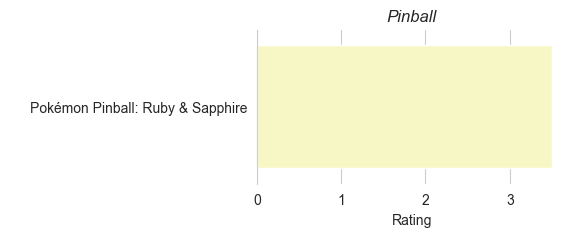

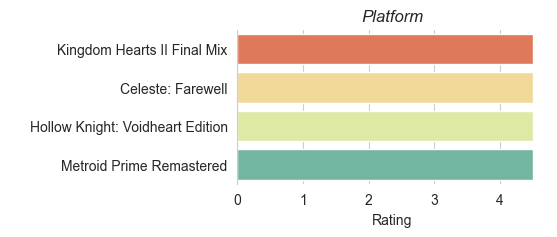

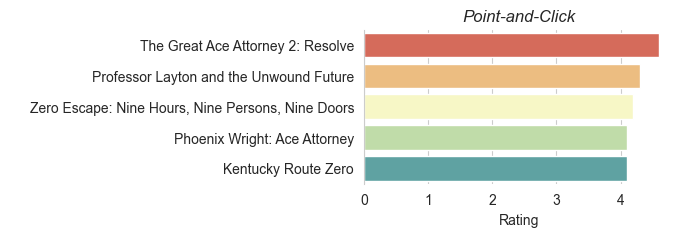

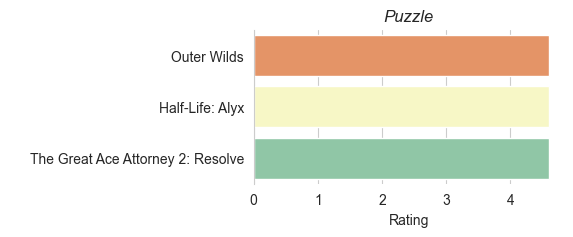

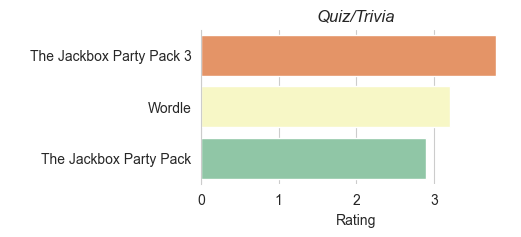

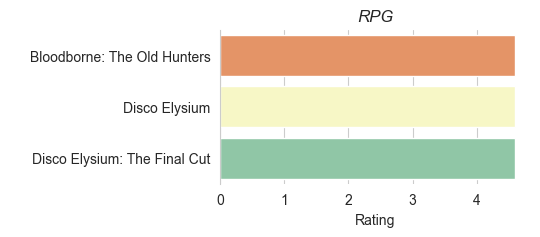

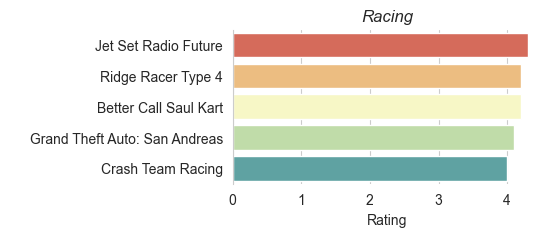

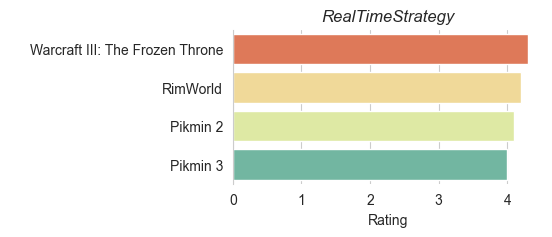

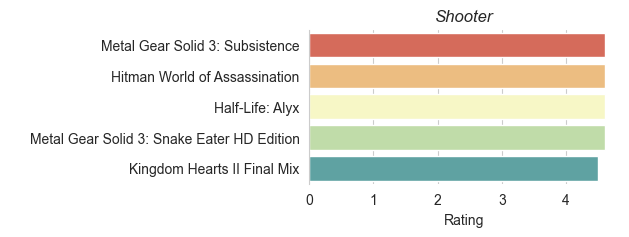

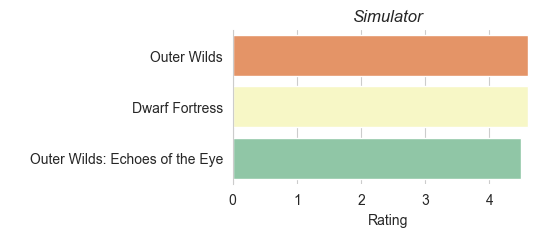

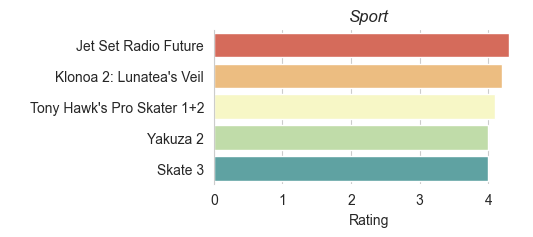

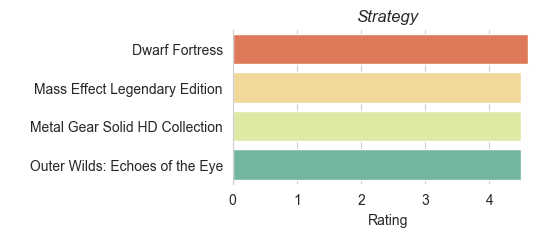

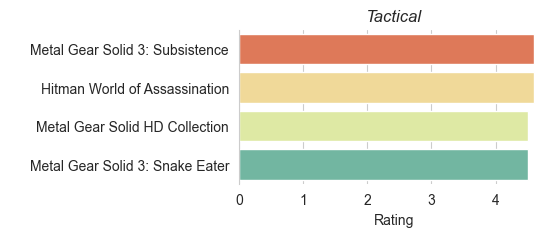

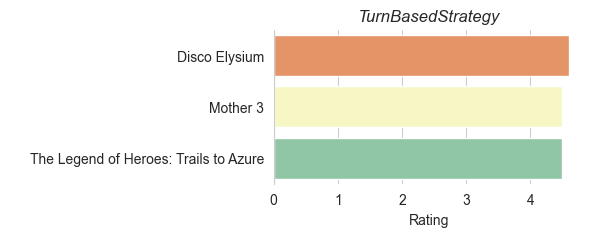

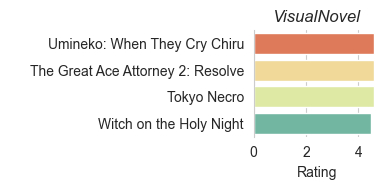

In [28]:
for i in genre_columns:
    plt.figure(figsize = (4,2))
    sns.barplot(data = df[df[i] == 1].sort_values('rating' , ascending = False).head(5) , x = 'rating' , y = 'title' , palette = 'Spectral')
    plt.title(i , style='italic')
    plt.xlabel('Rating')
    plt.ylabel(' ')
    sns.despine(right=True, top=True, bottom=True)
    fig.show()

plt.tight_layout()    